In [30]:
import gurobipy as gp
import pandas as pd
import numpy as np
from gurobipy import GRB
import importlib
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('/Users/boosman/Documents/2_Econometrie/Master/Thesis/Non_ADMM_OPF')

from Devices_NA import CHP, Generator, Renewable, TransmissionLine, ThermalLoad, FixedLoad, FixedLoadTest, Storage
from Connections_NA import EConnection, HConnection
from Networks_NA import Network
from Potential_Devices import addBudgetConstraint, PotentialStorage, PotentialTransmissionLine, PotentialRenewable


In [31]:
import Devices_NA
import Connections_NA
import Networks_NA
import Potential_Devices
import importlib
importlib.reload(Devices_NA)
importlib.reload(Connections_NA)
importlib.reload(Networks_NA)
importlib.reload(Potential_Devices)
from Connections_NA import EConnection, HConnection
from Networks_NA import Network
from Devices_NA import CHP, Generator, Renewable, TransmissionLine, ThermalLoad, FixedLoad, FixedLoadTest, Storage, PowerDissipation
from Potential_Devices import addBudgetConstraint, PotentialStorage, PotentialTransmissionLine, PotentialRenewable
from Devices_Heuristic import HeuristicStorage, HeuristicTransmissionLine, HeuristicRenewable


# Investment Optimization

In [38]:
#initiate the model and the time vector

m = gp.Model()
m.setParam('OutputFlag', 0)
T = list(range(8760))


small_wind = 3
large_wind = 6
small_pv = 2
large_pv = 4
small_storage = 30
large_storage = 60
high_transmission_cap = 4
low_transmission_cap = 2
alpha=0.25
charge_max = 2 
discharge_max = 2

price_list = { 'Storage' : {small_storage : 15, large_storage : 28}, 'Wind' :{small_wind: 55 , large_wind: 100}, 
              'PV' :{small_pv : 20, large_pv: 38},
              'Transmission' : {'Short':{low_transmission_cap: 10, high_transmission_cap : 15}, 'Long':{low_transmission_cap :15, high_transmission_cap :25}
             }}

P_W_2_6 = PotentialRenewable(T, m, 1, price_list, 'Wind', large_wind)
P_W_3_6 = PotentialRenewable(T, m, 2, price_list, 'Wind', large_wind)
P_W_4_6 = PotentialRenewable(T, m, 3, price_list, 'Wind', large_wind)
P_W_5_6 = PotentialRenewable(T, m, 4, price_list, 'Wind', large_wind)
P_W_6_6 = PotentialRenewable(T, m, 5, price_list, 'Wind', large_wind)
P_W_7_6 = PotentialRenewable(T, m, 6, price_list, 'Wind', large_wind)
P_W_8_6 = PotentialRenewable(T, m, 7, price_list, 'Wind', large_wind)
P_W_9_6 = PotentialRenewable(T, m, 8, price_list, 'Wind', large_wind)
P_W_10_3 = PotentialRenewable(T, m, 9, price_list, 'Wind', small_wind)

P_PV_1_1 = PotentialRenewable(T, m, 0, price_list, 'PV', small_pv)
P_PV_2_4 = PotentialRenewable(T, m, 1, price_list, 'PV', large_pv)
P_PV_3_4 = PotentialRenewable(T, m, 2, price_list, 'PV', large_pv)
P_PV_4_4 = PotentialRenewable(T, m, 3, price_list, 'PV', large_pv)
P_PV_5_4 = PotentialRenewable(T, m, 4, price_list, 'PV', large_pv)
P_PV_6_4 = PotentialRenewable(T, m, 5, price_list, 'PV', large_pv)
P_PV_7_4 = PotentialRenewable(T, m, 6, price_list, 'PV', large_pv)
P_PV_8_4 = PotentialRenewable(T, m, 7, price_list, 'PV', large_pv)
P_PV_9_4 = PotentialRenewable(T, m, 8, price_list, 'PV', large_pv)
P_PV_10_1 = PotentialRenewable(T, m, 9, price_list, 'PV', small_pv)

P_B_1_120 = PotentialStorage(T, m, 0, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_2_120 = PotentialStorage(T, m, 1, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_3_120 = PotentialStorage(T, m, 2, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_4_120 = PotentialStorage(T, m, 3, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_5_120 = PotentialStorage(T, m, 4, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_6_120 = PotentialStorage(T, m, 5, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_7_120 = PotentialStorage(T, m, 6, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_8_120 = PotentialStorage(T, m, 7, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_9_120 = PotentialStorage(T, m, 8, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)
P_B_10_120 = PotentialStorage(T, m, 9, price_list, discharge_max = discharge_max, charge_max = charge_max, energy_max = large_storage)



P_T_1_high = PotentialTransmissionLine(T, m, 0, 5, price_list, length = 'Long', power_max =high_transmission_cap, alpha = alpha)
P_T_2_high = PotentialTransmissionLine(T, m, 1, 3, price_list, length = 'Long', power_max =high_transmission_cap, alpha = alpha)
P_T_3_high = PotentialTransmissionLine(T, m, 1, 2, price_list, length = 'Short',power_max = high_transmission_cap, alpha = alpha)
P_T_4_high = PotentialTransmissionLine(T, m, 3, 5, price_list, length = 'Long', power_max =high_transmission_cap, alpha = alpha)
P_T_5_high = PotentialTransmissionLine(T, m, 3, 4, price_list, length = 'Short',power_max = high_transmission_cap, alpha = alpha)
P_T_6_high = PotentialTransmissionLine(T, m, 4, 9, price_list, length = 'Long', power_max =high_transmission_cap, alpha = alpha)
P_T_7_high = PotentialTransmissionLine(T, m, 4, 7, price_list, length = 'Long', power_max =high_transmission_cap, alpha = alpha)
P_T_8_high = PotentialTransmissionLine(T, m, 5, 9, price_list, length = 'Long', power_max =high_transmission_cap, alpha = alpha)
P_T_9_high = PotentialTransmissionLine(T, m, 8, 9, price_list, length = 'Short',power_max = high_transmission_cap, alpha = alpha)

potential_items = [
    P_W_2_6, P_W_3_6, P_W_4_6, P_W_5_6, P_W_6_6, P_W_7_6, P_W_8_6, P_W_9_6, P_W_10_3,
    P_PV_1_1, P_PV_2_4, P_PV_3_4, P_PV_4_4, P_PV_5_4, P_PV_6_4, P_PV_7_4, P_PV_8_4, P_PV_9_4, P_PV_10_1,
    P_B_1_120, P_B_2_120, P_B_3_120, P_B_4_120, P_B_5_120, P_B_6_120, P_B_7_120, P_B_8_120, P_B_9_120, P_B_10_120,
    P_T_1_high, P_T_2_high, P_T_3_high, P_T_4_high, P_T_5_high, P_T_6_high, P_T_7_high, P_T_8_high, P_T_9_high
]

pot_1 = [
        P_PV_1_1.Econnections[0], 
        P_B_1_120.Econnections[0], 
        P_T_1_high.Econnections[0], 
]

pot_2 = [
        P_W_2_6.Econnections[0], 
        P_PV_2_4.Econnections[0], 
        P_B_2_120.Econnections[0], 
        P_T_2_high.Econnections[0],
        P_T_3_high.Econnections[0],
]

pot_3 = [
        P_W_3_6.Econnections[0], 
        P_PV_3_4.Econnections[0], 
        P_B_3_120.Econnections[0], 
        P_T_3_high.Econnections[1],
]

pot_4 = [
        P_W_4_6.Econnections[0], 
        P_PV_4_4.Econnections[0], 
        P_B_4_120.Econnections[0], 
        P_T_2_high.Econnections[1],
        P_T_4_high.Econnections[0],
        P_T_5_high.Econnections[0],
]

pot_5 = [
        P_W_5_6.Econnections[0], 
        P_PV_5_4.Econnections[0], 
        P_B_5_120.Econnections[0],
        P_T_5_high.Econnections[1],
        P_T_6_high.Econnections[0],
        P_T_7_high.Econnections[0],
]

pot_6 = [
        P_W_6_6.Econnections[0], 
        P_PV_6_4.Econnections[0], 
        P_B_6_120.Econnections[0],
        P_T_4_high.Econnections[1],
        P_T_8_high.Econnections[0],
        P_T_1_high.Econnections[1], 
]

pot_7 = [
        # P_W_7_3.Econnections[0],
        P_W_7_6.Econnections[0], 
        # P_PV_7_1.Econnections[0],
        P_PV_7_4.Econnections[0], 
        # P_B_7_60.Econnections[0],
        P_B_7_120.Econnections[0]
]

pot_8 = [
        P_W_8_6.Econnections[0],
        P_PV_8_4.Econnections[0], 
        P_B_8_120.Econnections[0],
        P_T_7_high.Econnections[1],
]

pot_9 = [
        P_W_9_6.Econnections[0],
        P_PV_9_4.Econnections[0], 
        P_B_9_120.Econnections[0],
        P_T_9_high.Econnections[0],
]

pot_10 = [
        P_W_10_3.Econnections[0],
        P_PV_10_1.Econnections[0],
        P_B_10_120.Econnections[0],
        P_T_6_high.Econnections[1],
        P_T_9_high.Econnections[1],
        P_T_8_high.Econnections[1],
]
print("Setup - Finished")

Setup - Finished


In [39]:
# The benchmark system
##############################
# NET 1 Devices: 

LE_hh_1= FixedLoad(T, m,  'Households' , 30000)
LE_wc_1= FixedLoad(T, m, 'Weighted_Commercial' , 35000)
TL_1 = ThermalLoad(T, m, 'HP', 3)
PV_1 = Renewable(T, m, technology  = 'PV', install_cap = 3)
# G_1 = Generator(T, m,  power_max=12, power_min=0, ramp_min = -0.25, ramp_max = 0.25, operating_point = 3, alpha=1, beta=40, gamma = 1)
CHP_1 = CHP(T, m,  power_max=18, power_min=0,  ramp_min =  -1, ramp_max = 1, operating_point = 3, alpha=1, beta=40, gamma = 1)
PD_1 = PowerDissipation(T, m)


##############################
# NET 2 Devices: 
LE_hh_2= FixedLoad(T, m, 'Households' , 5000)
PD_2 = PowerDissipation(T, m)
W_2 = Renewable(T, m, technology  = 'Wind', install_cap = 6)



##############################
# NET 3 Devices: 
LE_m_3= FixedLoad(T, m,  'Manufacturing' , 20000)
B_3    = Storage(T, m, discharge_max = 3, charge_max = 3, energy_max = 60)
PD_3 = PowerDissipation(T, m)


##############################
# NET 4 Devices: 
B_4    = Storage(T, m, discharge_max = 2, charge_max = 2, energy_max = 30)
LE_hh_4= FixedLoad(T, m, 'Households' , 6000)
PD_4 = PowerDissipation(T, m)


##############################
# NET 5 Devices: 
G_5 = Generator(T, m,  power_max=20, power_min=0, ramp_min = -0.5, ramp_max = 0.5, operating_point = 4, alpha=0.75, beta=33, gamma = 1)
PV_5 = Renewable(T, m, technology  = 'PV', install_cap = 12)
PD_5 = PowerDissipation(T, m)


##############################
# NET 6 Devices: 
PV_6 = Renewable(T, m, technology  = 'PV', install_cap = 9)
W_6 = Renewable(T, m, technology  = 'Wind', install_cap = 18)
PD_6 = PowerDissipation(T, m)

##############################
# NET 7 Devices: 
LE_wc_7= FixedLoad(T, m, 'Weighted_Commercial' , 4000)
LE_m_7= FixedLoad(T, m, 'Manufacturing' , 5000)
PD_7 = PowerDissipation(T, m)


##############################
# NET 8 Devices: 
LE_hh_8= FixedLoad(T, m, 'Households' , 10000)
LE_wc_8= FixedLoad(T, m, 'Weighted_Commercial' , 4000)
PV_8 = Renewable(T, m, technology  = 'PV', install_cap = 6)
PD_8 = PowerDissipation(T, m)

##############################
# NET 9 Devices: 
W_9 = Renewable(T, m, technology  = 'Wind', install_cap = 6)
LE_m_9= FixedLoad(T, m, 'Manufacturing' , 45000)
PD_9 = PowerDissipation(T, m)


##############################
# NET 10 Devices: 
# G_10 = Generator(T, m,  power_max=8, power_min=0, ramp_min = -1, ramp_max = 1, operating_point = 4, alpha=1.5, beta=55, gamma = 1)
CHP_10 = CHP(T, m,  power_max=12, power_min=0,  ramp_min = -2, ramp_max = 2, operating_point = 2, alpha=0.25, beta=43, gamma = 1)
LE_hh_10= FixedLoad(T, m, 'Households' , 20000)
LE_wc_10= FixedLoad(T, m, 'Weighted_Commercial' , 25000)
PD_10 = PowerDissipation(T, m)
TL_10 = ThermalLoad(T, m, 'HP', 2)

##############################
# NET 11 Devices: 
HD_11 = PowerDissipation(T, m)
TL_11 = ThermalLoad(T, m, 'Heating', 3)


# NET 12 Devices:
HD_12 = PowerDissipation(T, m)
TL_12 = ThermalLoad(T, m, 'Heating', 2)



############### Transmission Lines
alpha = 0.25
T1 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T2 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T3 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T4 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T5 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T6 = TransmissionLine(T, m, power_max=3, alpha = alpha)
T7 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T8 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T9 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T10= TransmissionLine(T, m, power_max=4, alpha = alpha)
T11 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T12 = TransmissionLine(T, m, power_max=4, alpha = alpha)
# T13 = TransmissionLine(T, m, power_max=5)

transmisions = [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12]


N1 = Network(T,  m, [PD_1.Econnections[0],PV_1.Econnections[0], TL_1.Econnections[0], LE_hh_1.Econnections[0], LE_wc_1.Econnections[0], CHP_1.Econnections[0], T1.Econnections[0], T2.Econnections[0]] + pot_1)
N2 = Network(T,  m, [PD_2.Econnections[0], W_2.Econnections[0], LE_hh_2.Econnections[0], T2.Econnections[1], T3.Econnections[0]] + pot_2)
N3 = Network(T,  m, [PD_3.Econnections[0], LE_m_3.Econnections[0], B_3.Econnections[0], T4.Econnections[0], T5.Econnections[0]] + pot_3)
N4 = Network(T,  m, [PD_4.Econnections[0], LE_hh_4.Econnections[0], B_4.Econnections[0], T1.Econnections[1], T6.Econnections[0]] + pot_4)
N5 = Network(T,  m, [PD_5.Econnections[0], G_5.Econnections[0], PV_5.Econnections[0], T3.Econnections[1], T4.Econnections[1], T7.Econnections[0]] + pot_5)
N6 = Network(T,  m, [PD_6.Econnections[0], PV_6.Econnections[0], W_6.Econnections[0], T8.Econnections[0], T9.Econnections[0]] + pot_6)
N7 = Network(T,  m, [PD_7.Econnections[0], LE_wc_7.Econnections[0], LE_m_7.Econnections[0], T6.Econnections[1], T7.Econnections[1], T9.Econnections[1], T10.Econnections[0], T11.Econnections[0]] + pot_7)
N8 = Network(T,  m, [PD_8.Econnections[0], LE_hh_8.Econnections[0], LE_wc_8.Econnections[0], PV_8.Econnections[0], T5.Econnections[1], T12.Econnections[0]] + pot_8)
N9 = Network(T,  m, [PD_9.Econnections[0], W_9.Econnections[0], LE_m_9.Econnections[0], T8.Econnections[1], T10.Econnections[1]] + pot_9)
N10 = Network(T, m, [PD_10.Econnections[0], TL_10.Econnections[0], CHP_10.Econnections[0], LE_hh_10.Econnections[0], LE_wc_10.Econnections[0], T11.Econnections[1], T12.Econnections[1]] + pot_10)
N11 = Network(T, m, [HD_11.Econnections[0], TL_11.Econnections[0], CHP_1.Econnections[1]] )
N12 = Network(T, m, [HD_12.Econnections[0], TL_12.Econnections[0], CHP_10.Econnections[1]] )

nets = [N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12]
print("Benchmark setup finished")

Benchmark setup finished


# Non-important now

In [22]:
addBudgetConstraint(potential_items, 240)

In [23]:
m.optimize()
if m.status == GRB.OPTIMAL:
    print("Optimal solution found.")
elif m.status == GRB.INFEASIBLE:
    print("Model is infeasible.")
elif m.status == GRB.UNBOUNDED:
    print("Model is unbounded.")
elif m.status == GRB.INF_OR_UNBD:
    print("Model is either infeasible or unbounded.")
else:
    print("Optimization was stopped with status", m.status)
N1.updateDual()
N2.updateDual()
N3.updateDual()
N4.updateDual()
N5.updateDual()
N6.updateDual()
N7.updateDual()
N8.updateDual()
N9.updateDual()
N10.updateDual()

Optimal solution found.


In [24]:
x = [item for item in potential_items if 1 - item.z.x < 0.5]    
for i in x: 
    print(i.name)

Renewable Wind
Renewable PV
Storage
Transmission Line


In [25]:
j=0
for i in potential_items:
    print(f"{i.name} - Net: {i.net_from}")
    print(i.z.x)
    j+=1

Renewable Wind - Net: 1
1.2186715259745508e-12
Renewable Wind - Net: 2
0.36012540667733806
Renewable Wind - Net: 3
0.3063671041902339
Renewable Wind - Net: 4
1.228094001140721e-12
Renewable Wind - Net: 5
4.169479186345575e-13
Renewable Wind - Net: 6
3.292217233962627e-12
Renewable Wind - Net: 7
0.7717271298556502
Renewable Wind - Net: 8
2.002647191566533e-12
Renewable Wind - Net: 9
2.2412650001327243e-12
Renewable PV - Net: 0
0.1292276047357369
Renewable PV - Net: 1
1.611573385271149e-12
Renewable PV - Net: 2
0.29765485826822946
Renewable PV - Net: 3
0.6612880614860891
Renewable PV - Net: 4
8.547247890979222e-13
Renewable PV - Net: 5
1.650151219465333e-12
Renewable PV - Net: 6
8.178342616671574e-12
Renewable PV - Net: 7
6.65157758987557e-11
Renewable PV - Net: 8
0.06537734175338673
Renewable PV - Net: 9
6.3946412679139216e-12
Storage - Net: 0
0.1563522464259655
Storage - Net: 1
1.2280599530360766e-07
Storage - Net: 2
3.676161198127938e-08
Storage - Net: 3
4.887440503600653e-08
Storage 

In [26]:
def average(lst):
    return sum(lst) / len(lst)

def printDuals(nets):
    i=1
    for n in nets:
        print(f"Net {i} - avg Dual: {average(n.dual)}")
        i +=1
        
def printMaxCapacity(transmissions, epsilon):
    i =1 
    for t in transmissions:
        count = sum(1 for value in t.Econnections[0].powerValues if abs(value - t.power_max) <= epsilon)
        print(f"Transmission line {i} is {count/87.60:.2f}% of the time opertaing at its maximum capacity")
        i+=1
# printMaxCapacity(transmisions, 0.1)
printDuals(nets)

Net 1 - avg Dual: -36.82877987529995
Net 2 - avg Dual: -33.84567862848251
Net 3 - avg Dual: -34.58991870024551
Net 4 - avg Dual: -34.806591296651085
Net 5 - avg Dual: -33.30816228926748
Net 6 - avg Dual: -32.87805204805007
Net 7 - avg Dual: -34.511642125179534
Net 8 - avg Dual: -34.6681635573393
Net 9 - avg Dual: -34.75057401577754
Net 10 - avg Dual: -35.45785401738066
Net 11 - avg Dual: 0.0
Net 12 - avg Dual: 0.0


# Relax and Fit

In [40]:
# Separate lists based on prefixes
wind = [item for item in potential_items if item.name == "Renewable Wind"]
pv = [item for item in potential_items if item.name == "Renewable PV"]
storage = [item for item in potential_items if item.name == "Storage"]
transmission = [item for item in potential_items if item.name == "Transmission Line"]

# Print the separate lists to verify
print("Wind:", wind)
print("PV:", pv)
print("Storage:", storage)
print("Transmission:", transmission)


Wind: [<Potential_Devices.PotentialRenewable object at 0x3552d06d0>, <Potential_Devices.PotentialRenewable object at 0x35529df50>, <Potential_Devices.PotentialRenewable object at 0x35d22da50>, <Potential_Devices.PotentialRenewable object at 0x3626cff50>, <Potential_Devices.PotentialRenewable object at 0x362c90550>, <Potential_Devices.PotentialRenewable object at 0x362dc2210>, <Potential_Devices.PotentialRenewable object at 0x3655d7b50>, <Potential_Devices.PotentialRenewable object at 0x3659fcdd0>, <Potential_Devices.PotentialRenewable object at 0x3667d7dd0>]
PV: [<Potential_Devices.PotentialRenewable object at 0x367103450>, <Potential_Devices.PotentialRenewable object at 0x3552d0b50>, <Potential_Devices.PotentialRenewable object at 0x367d62810>, <Potential_Devices.PotentialRenewable object at 0x371dfb790>, <Potential_Devices.PotentialRenewable object at 0x3744ba990>, <Potential_Devices.PotentialRenewable object at 0x3790d9810>, <Potential_Devices.PotentialRenewable object at 0x3793e151

In [41]:
def getInvestmentCost(device, size):
    if device.name == "Renewable Wind":
        if size == "S":
            price = price_list['Wind'][small_wind]
        else:
            price = price_list['Wind'][large_wind]
                
    elif device.name == "Renewable PV":
        if size == "S":
            price = price_list['PV'][small_pv]
        else:
            price = price_list['PV'][large_pv]
            
    elif device.name== "Storage":
        if size == "S":
            price = price_list['Storage'][small_storage]
        else:
            price = price_list['Storage'][large_storage]
            
    elif device.name== "Transmission Line":
        if device.length == 'Long':
            if size == "S":
                price = price_list['Transmission']['Long'][low_transmission_cap]
            else:
                price = price_list['Transmission']['Long'][high_transmission_cap]
        else:
            if size == "S":
                price = price_list['Transmission']['Short'][low_transmission_cap]
            else:
                price = price_list['Transmission']['Short'][high_transmission_cap]
    else:
        print('something went wrong')

    return price
    
def RelaxAndFit(wind, pv, storage, transmision, budget): 
    wind = wind
    pv = pv
    storage = storage
    transmision= transmision
    
    residual = budget
    selected_items = []
    k=0
    termination = False
    
    while not termination:
        print(k)
        addBudgetConstraint(wind + pv + storage + transmission, residual)
        m.optimize()
        dic = {}
        for i in wind: 
            if i.install_cap == small_wind: 
                fit_value = 1 - i.z.X
                dic[i] = {'S': fit_value, 'L': 100}
            else:
                fit_value_L = 1 - i.z.X
                fit_value_S = abs(0.5 - i.z.X)
                dic[i] = {'S': fit_value_S, 'L': fit_value_L}
                
        for i in pv: 
            if i.install_cap == small_pv: 
                fit_value = 1 - i.z.X
                dic[i] = {'S': fit_value, 'L': 100}
            else:
                fit_value_L = 1 - i.z.X
                fit_value_S = abs(0.33333 - i.z.X)
                dic[i] = {'S': fit_value_S, 'L': fit_value_L}
    
        for i in storage: 
            fit_value_L = 1 - i.z.X
            fit_value_S = abs(0.5 - i.z.X)
            dic[i] = {'S': fit_value_S, 'L': fit_value_L}
    
        for i in transmission: 
            fit_value_L = 1 - i.z.X
            fit_value_S = abs(0.5 - i.z.X)
            dic[i] = {'S': fit_value_S, 'L': fit_value_L}       
    
    
        lowest_fit_val = 100
        for device, fit_value in dic.items():
            for size, fit_val in fit_value.items():
                price = getInvestmentCost(device, size) 
                if price <= residual:
                    if fit_val < lowest_fit_val:
                        lowest_fit_val  = fit_val   
                        lowest_key = device
                        lowest_inner_key = size
                        investment = price
                        print(f"Price  =  {investment}")
                        print(f"Size  =  {lowest_inner_key}")
                        
        if lowest_fit_val != 100:
            residual -= investment
            if lowest_key.name == "Renewable Wind":
                wind.remove(lowest_key)
                effected_net = nets[lowest_key.net_from]
                effected_net.removeEconnection(lowest_key.Econnections[0])

                if lowest_inner_key == 'S':
                    new_device = HeuristicRenewable(T, m, lowest_key.net_from, price_list, 'Wind', small_wind)
                else:
                    new_device = HeuristicRenewable(T, m, lowest_key.net_from, price_list, 'Wind', large_wind)
                effected_net.addEconnection(new_device.Econnections[0])
                
            elif lowest_key.name == "Renewable PV":
                pv.remove(lowest_key)
                effected_net = nets[lowest_key.net_from]
                effected_net.removeEconnection(lowest_key.Econnections[0])
                
                if lowest_inner_key == 'S':
                    new_device = HeuristicRenewable(T, m, lowest_key.net_from, price_list, 'PV', small_pv)
                else:
                    new_device = HeuristicRenewable(T, m, lowest_key.net_from, price_list, 'PV', large_pv)
                effected_net.addEconnection(new_device.Econnections[0])
            
            elif lowest_key.name == "Storage":
                storage.remove(lowest_key)
                effected_net = nets[lowest_key.net_from]
                effected_net.removeEconnection(lowest_key.Econnections[0])
                
                if lowest_inner_key == 'S':
                    new_device = HeuristicStorage(T, m, lowest_key.net_from, price_list, discharge_max=discharge_max, charge_max=charge_max, energy_max=small_storage)
                else:
                    new_device = HeuristicStorage(T, m, lowest_key.net_from, price_list, discharge_max=discharge_max, charge_max=charge_max, energy_max=large_storage)
                effected_net.addEconnection(new_device.Econnections[0])
    
            elif lowest_key.name == "Transmission Line":
                transmision.remove(lowest_key)
                net_from = nets[lowest_key.net_from]
                net_to = nets[lowest_key.net_to]
                net_from.removeEconnection(lowest_key.Econnections[0])
                net_to.removeEconnection(lowest_key.Econnections[1])
                
                if lowest_inner_key == 'S':
                    new_device = HeuristicTransmissionLine(T, m, lowest_key.net_from, lowest_key.net_to, price_list, length=lowest_key.length, power_max=low_transmission_cap, alpha=alpha)
                else:
                    new_device = HeuristicTransmissionLine(T, m, lowest_key.net_from, lowest_key.net_to, price_list, length=lowest_key.length, power_max=high_transmission_cap, alpha=alpha)

                net_from.addEconnection(new_device.Econnections[0])
                net_to.addEconnection(new_device.Econnections[1])
            
            selected_items.append(new_device)
            print(new_device.name)
            print(residual)

            k+=1
        else: 
            print("Fertig")
            termination = True

    return selected_items, wind, pv, storage, transmission
        

In [42]:
low_transmission_cap

2

In [43]:
result, residual_wind, residual_pv, residual_storage, residual_transmission = RelaxAndFit(wind, pv, storage, transmission, 245)

0
Price  =  55
Size  =  S
Price  =  55
Size  =  S
Price  =  20
Size  =  S
Price  =  25
Size  =  L
Transmission Line
220
1
Price  =  55
Size  =  S
Price  =  55
Size  =  S
Price  =  20
Size  =  S
Renewable PV
200
2
Price  =  55
Size  =  S
Price  =  55
Size  =  S
Renewable Wind
145
3
Price  =  55
Size  =  S
Price  =  55
Size  =  S
Price  =  100
Size  =  L
Price  =  15
Size  =  S
Storage
130
4
Price  =  55
Size  =  S
Price  =  55
Size  =  S
Price  =  100
Size  =  L
Renewable Wind
30
5
Price  =  20
Size  =  S
Price  =  20
Size  =  S
Price  =  15
Size  =  S
Price  =  10
Size  =  S
Transmission Line
20
6
Price  =  20
Size  =  S
Price  =  20
Size  =  S
Price  =  15
Size  =  S
Storage
5
7
Fertig


In [23]:
for r in result:
    if r.name == "Renewable Wind":
        print(f"Name: {r.name} - Capcity: {r.install_cap} - Net: {r.net_from}")
    elif r.name == "Renewable PV":
        print(f"Name: {r.name} - Capcity: {r.install_cap} - Net: {r.net_from}")

    elif r.name == "Storage":
        print(f"Name: {r.name} - Capcity: {r.energy_max} - Net: {r.net_from}")

    elif r.name == "Transmission Line":
            print(f"Name: {r.name} - Capcity: {r.power_max} - From Net: {r.net_from} - To Net: {r.net_to}")


Name: Transmission Line - Capcity: 4 - From Net: 0 - To Net: 5
Name: Storage - Capcity: 30 - Net: 5
Name: Renewable Wind - Capcity: 3 - Net: 2
Name: Renewable Wind - Capcity: 6 - Net: 7
Name: Transmission Line - Capcity: 2 - From Net: 3 - To Net: 4
Name: Storage - Capcity: 30 - Net: 0
Name: Transmission Line - Capcity: 2 - From Net: 8 - To Net: 9
Name: Transmission Line - Capcity: 2 - From Net: 1 - To Net: 2


In [70]:
for i in residual_wind: 
    net = nets[i.net_from]
    net.removeEconnection(i.Econnections[0])
for i in residual_pv: 
    net = nets[i.net_from]
    net.removeEconnection(i.Econnections[0])

for i in residual_storage: 
    net = nets[i.net_from]
    net.removeEconnection(i.Econnections[0])
    
for i in residual_transmission: 
    net_from = nets[i.net_from]
    net_to   = nets[i.net_to]
    net_from.removeEconnection(i.Econnections[0])
    net_to.removeEconnection(i.Econnections[1])

m.optimize()
print(m.ObjVal)

4049021.1417054324


# TESTING 

In [26]:
m.optimize()
dic = {}
residual = 300
lowest_fit_val =100
for i in wind: 
    if i.install_cap == small_wind: 
        fit_value = 1 - i.z.X
        dic[i] = {'S': fit_value, 'L': 100}
    else:
        fit_value_L = 1 - i.z.X
        fit_value_S = abs(0.5 - i.z.X)
        dic[i] = {'S': fit_value_S, 'L': fit_value_L}
        
for i in pv: 
    if i.install_cap == small_pv: 
        fit_value = 1 - i.z.X
        dic[i] = {'S': fit_value, 'L': 100}
    else:
        fit_value_L = 1 - i.z.X
        fit_value_S = abs(0.33333 - i.z.X)
        dic[i] = {'S': fit_value_S, 'L': fit_value_L}

for i in storage: 
    fit_value_L = 1 - i.z.X
    fit_value_S = abs(0.5 - i.z.X)
    dic[i] = {'S': fit_value_S, 'L': fit_value_L}

for i in transmission: 
    fit_value_L = 1 - i.z.X
    fit_value_S = abs(0.5 - i.z.X)
    dic[i] = {'S': fit_value_S, 'L': fit_value_L}       

for device, fit_value in dic.items():
    for size, fit_val in fit_value.items():
        price = getInvestmentCost(device, size)
        if price <= residual:
            if fit_val < lowest_fit_val:
                lowest_fit_val  = fit_val   
                lowest_key = device
                lowest_inner_key = size
                investment = price



In [27]:
lowest_fit_val

0.00698295821541739

In [28]:
lowest_key.net_from

0

In [29]:
size

'L'

In [31]:
lowest_key.name

'Transmission Line'

In [25]:
discharge_max = 2
charge_max = 2
# storage.remove(lowest_key)
# effected_net = nets[lowest_key.net_from]
# effected_net.removeEconnection(lowest_key.Econnections[0])

if lowest_inner_key == 'S':
    new_device = HeuristicStorage(T, m, lowest_key.net_from, price_list, discharge_max=discharge_max, charge_max=charge_max, energy_max=small_storage)
else:
    new_device = HeuristicStorage(T, m, lowest_key.net_from, price_list, discharge_max=discharge_max, charge_max=charge_max, energy_max=large_storage)
effected_net.addEconnection(new_device.Econnections[0])

In [216]:
def getInvestmentCost(device, size):
    if device.name == "Renewable Wind":
        if size == "S":
            price = price_list['Wind'][small_wind]
        else:
            price = price_list['Wind'][large_wind]
                
    elif device.name == "Renewable PV":
        if size == "S":
            price = price_list['PV'][small_pv]
        else:
            price = price_list['PV'][large_pv]
            
    elif device.name== "Storage":
        if size == "S":
            price = price_list['Storage'][small_storage]
        else:
            price = price_list['Storage'][large_storage]
    elif device.name== "Transmission Line":
        if device.length == 'Long':
            if size == "S":
                price = price_list['Transmission']['Long'][low_transmission_cap]
            else:
                price = price_list['Transmission']['Long'][high_transmission_cap]
        else:
            if size == "S":
                price = price_list['Transmission']['Short'][low_transmission_cap]
            else:
                price = price_list['Transmission']['Short'][high_transmission_cap]
    else:
        print('something went wrong')

    return price

In [17]:
if lowest_key.name == "Renewable Wind":
    wind.remove(lowest_key)
    effected_net = nets[lowest_key.net_from]
    effected_net.removeEconnection(lowest_key.Econnections[0])
    
    if lowest_inner_key == 'S':
        new_device = HeuristicRenewable(T, m, lowest_key.net_from, price_list, 'Wind', small_wind)
    else:
        new_device = HeuristicRenewable(T, m, lowest_key.net_from, price_list, 'Wind', large_wind)
    effected_net.addEconnection(new_device.Econnections[0])

AttributeError: 'PotentialStorage' object has no attribute 'technology'

# Benchmark

In [6]:
import gurobipy as gp
import pandas as pd
import numpy as np
from gurobipy import GRB
import importlib
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('/Users/boosman/Documents/2_Econometrie/Master/Thesis/Non_ADMM_OPF')

from Devices_NA import CHP, Generator, Renewable, TransmissionLine, ThermalLoad, FixedLoad, FixedLoadTest, Storage
from Connections_NA import EConnection, HConnection
from Networks_NA import Network
from Potential_Devices import addBudgetConstraint, PotentialStorage, PotentialTransmissionLine, PotentialRenewable

import Devices_NA
import Connections_NA
import Networks_NA
import Potential_Devices
import importlib
importlib.reload(Devices_NA)
importlib.reload(Connections_NA)
importlib.reload(Networks_NA)
importlib.reload(Potential_Devices)
from Connections_NA import EConnection, HConnection
from Networks_NA import Network
from Devices_NA import CHP, Generator, Renewable, TransmissionLine, ThermalLoad, FixedLoad, FixedLoadTest, Storage, PowerDissipation,HeatDissipation
from Potential_Devices import addBudgetConstraint, PotentialStorage, PotentialTransmissionLine, PotentialRenewable
from Devices_Heuristic import HeuristicStorage, HeuristicTransmissionLine, HeuristicRenewable


In [7]:
#initiate the model and the time vector

m = gp.Model()
m.setParam('OutputFlag', 0)
T = list(range(8760))

## The benchmark system
##############################
# NET 1 Devices: 

LE_hh_1= FixedLoad(T, m,  'Households' , 30000)
LE_wc_1= FixedLoad(T, m, 'Weighted_Commercial' , 35000)
TL_1 = ThermalLoad(T, m, 'HP', 3)
PV_1 = Renewable(T, m, technology  = 'PV', install_cap = 3)
# G_1 = Generator(T, m,  power_max=12, power_min=0, ramp_min = -0.25, ramp_max = 0.25, operating_point = 3, alpha=1, beta=40, gamma = 1)
CHP_1 = CHP(T, m,  power_max=18, power_min=0,  ramp_min =  -1, ramp_max = 1, operating_point = 3, alpha=1, beta=40, gamma = 1)
PD_1 = PowerDissipation(T, m)


##############################
# NET 2 Devices: 
LE_hh_2= FixedLoad(T, m, 'Households' , 5000)
PD_2 = PowerDissipation(T, m)
W_2 = Renewable(T, m, technology  = 'Wind', install_cap = 3)



##############################
# NET 3 Devices: 
LE_m_3= FixedLoad(T, m,  'Manufacturing' , 20000)
B_3    = Storage(T, m, discharge_max = 3, charge_max = 3, energy_max = 30)
PD_3 = PowerDissipation(T, m)


##############################
# NET 4 Devices: 
B_4    = Storage(T, m, discharge_max = 2, charge_max = 2, energy_max = 30)
LE_hh_4= FixedLoad(T, m, 'Households' , 6000)
PD_4 = PowerDissipation(T, m)


##############################
# NET 5 Devices: 
G_5 = Generator(T, m,  power_max=20, power_min=0, ramp_min = -0.5, ramp_max = 0.5, operating_point = 4, alpha=0.75, beta=33, gamma = 1)
PV_5 = Renewable(T, m, technology  = 'PV', install_cap = 12)
PD_5 = PowerDissipation(T, m)


##############################
# NET 6 Devices: 
PV_6 = Renewable(T, m, technology  = 'PV', install_cap = 9)
W_6 = Renewable(T, m, technology  = 'Wind', install_cap = 18)
PD_6 = PowerDissipation(T, m)

##############################
# NET 7 Devices: 
LE_wc_7= FixedLoad(T, m, 'Weighted_Commercial' , 4000)
LE_m_7= FixedLoad(T, m, 'Manufacturing' , 5000)
PD_7 = PowerDissipation(T, m)


##############################
# NET 8 Devices: 
LE_hh_8= FixedLoad(T, m, 'Households' , 10000)
LE_wc_8= FixedLoad(T, m, 'Weighted_Commercial' , 4000)
PV_8 = Renewable(T, m, technology  = 'PV', install_cap = 6)
PD_8 = PowerDissipation(T, m)

##############################
# NET 9 Devices: 
W_9 = Renewable(T, m, technology  = 'Wind', install_cap = 8)
LE_m_9= FixedLoad(T, m, 'Manufacturing' , 45000)
PD_9 = PowerDissipation(T, m)


##############################
# NET 10 Devices: 
# G_10 = Generator(T, m,  power_max=8, power_min=0, ramp_min = -1, ramp_max = 1, operating_point = 4, alpha=1.5, beta=55, gamma = 1)
CHP_10 = CHP(T, m,  power_max=12, power_min=0,  ramp_min = -2, ramp_max = 2, operating_point = 2, alpha=0.25, beta=43, gamma = 1)
LE_hh_10= FixedLoad(T, m, 'Households' , 20000)
LE_wc_10= FixedLoad(T, m, 'Weighted_Commercial' , 25000)
PD_10 = PowerDissipation(T, m)
TL_10 = ThermalLoad(T, m, 'HP', 2)

##############################
# NET 11 Devices: 
HD_11 = PowerDissipation(T, m)
TL_11 = ThermalLoad(T, m, 'Heating', 3)


# NET 12 Devices:
HD_12 = PowerDissipation(T, m)
TL_12 = ThermalLoad(T, m, 'Heating', 2)



############### Transmission Lines
alpha = 0.25
T1 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T2 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T3 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T4 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T5 = TransmissionLine(T, m, power_max=2, alpha = alpha)
T6 = TransmissionLine(T, m, power_max=3, alpha = alpha)
T7 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T8 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T9 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T10= TransmissionLine(T, m, power_max=4, alpha = alpha)
T11 = TransmissionLine(T, m, power_max=4, alpha = alpha)
T12 = TransmissionLine(T, m, power_max=4, alpha = alpha)
# T13 = TransmissionLine(T, m, power_max=5)

transmisions = [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12]


N1 = Network(T,  m, [PD_1.Econnections[0],PV_1.Econnections[0], TL_1.Econnections[0], LE_hh_1.Econnections[0], LE_wc_1.Econnections[0], CHP_1.Econnections[0], T1.Econnections[0], T2.Econnections[0]] )
N2 = Network(T,  m, [PD_2.Econnections[0], W_2.Econnections[0], LE_hh_2.Econnections[0], T2.Econnections[1], T3.Econnections[0]] )
N3 = Network(T,  m, [PD_3.Econnections[0], LE_m_3.Econnections[0], B_3.Econnections[0], T4.Econnections[0], T5.Econnections[0]])
N4 = Network(T,  m, [PD_4.Econnections[0], LE_hh_4.Econnections[0], B_4.Econnections[0], T1.Econnections[1], T6.Econnections[0]] )
N5 = Network(T,  m, [PD_5.Econnections[0], G_5.Econnections[0], PV_5.Econnections[0], T3.Econnections[1], T4.Econnections[1], T7.Econnections[0]] )
N6 = Network(T,  m, [PD_6.Econnections[0], PV_6.Econnections[0], W_6.Econnections[0], T8.Econnections[0], T9.Econnections[0]] )
N7 = Network(T,  m, [PD_7.Econnections[0], LE_wc_7.Econnections[0], LE_m_7.Econnections[0], T6.Econnections[1], T7.Econnections[1], T9.Econnections[1], T10.Econnections[0], T11.Econnections[0]] )
N8 = Network(T,  m, [PD_8.Econnections[0], LE_hh_8.Econnections[0], LE_wc_8.Econnections[0], PV_8.Econnections[0], T5.Econnections[1], T12.Econnections[0]] )
N9 = Network(T,  m, [PD_9.Econnections[0], W_9.Econnections[0], LE_m_9.Econnections[0], T8.Econnections[1], T10.Econnections[1]])
N10 = Network(T, m, [PD_10.Econnections[0], TL_10.Econnections[0], CHP_10.Econnections[0], LE_hh_10.Econnections[0], LE_wc_10.Econnections[0], T11.Econnections[1], T12.Econnections[1]])
N11 = Network(T, m, [HD_11.Econnections[0], TL_11.Econnections[0], CHP_1.Econnections[1]] )
N12 = Network(T, m, [HD_12.Econnections[0], TL_12.Econnections[0], CHP_10.Econnections[1]] )

nets = [N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12]
print("Benchmark setup finished")
print("Setup-finishe")

Benchmark setup finished
Setup-finishe


In [10]:
m.optimize()
if m.status == GRB.OPTIMAL:
    print("Optimal solution found.")
    N1.updateDual()
    N2.updateDual()
    N3.updateDual()
    N4.updateDual()
    N5.updateDual()
    N6.updateDual()
    N7.updateDual()
    N8.updateDual()
    N9.updateDual()
    N10.updateDual()
    N11.updateDual()
    N12.updateDual()

elif m.status == GRB.INFEASIBLE:
    print("Model is infeasible.")
elif m.status == GRB.UNBOUNDED:
    print("Model is unbounded.")
elif m.status == GRB.INF_OR_UNBD:
    print("Model is either infeasible or unbounded.")
else:
    print("Optimization was stopped with status", m.status)


Optimal solution found.


In [11]:
def average(lst):
    return sum(lst) / len(lst)

def printDuals(nets):
    i=1
    for n in nets:
        print(f"Net {i} - avg Dual: {average(n.dual)}")
        i +=1
        
def printMaxCapacity(transmissions, epsilon):
    i =1 
    for t in transmissions:
        count = sum(1 for value in t.Econnections[0].powerValues if abs(value - t.power_max) <= epsilon)
        print(f"Transmission line {i} is {count/87.60:.2f}% of the time opertaing at its maximum capacity")
        i+=1
def printMaxCapacity2(transmissions):
    i =1 
    for t in transmissions:
        count = sum(abs(value) for value in t.Econnections[0].powerValues)/(87.60*t.power_max)
        print(f"Transmission line {i} is {count}% of the time opertaing at its maximum capacity")
        i+=1
        
printMaxCapacity(transmisions, 0.1)
printMaxCapacity2(transmisions)

printDuals(nets)

Transmission line 1 is 0.97% of the time opertaing at its maximum capacity
Transmission line 2 is 0.00% of the time opertaing at its maximum capacity
Transmission line 3 is 0.00% of the time opertaing at its maximum capacity
Transmission line 4 is 0.00% of the time opertaing at its maximum capacity
Transmission line 5 is 1.29% of the time opertaing at its maximum capacity
Transmission line 6 is 0.00% of the time opertaing at its maximum capacity
Transmission line 7 is 7.13% of the time opertaing at its maximum capacity
Transmission line 8 is 23.98% of the time opertaing at its maximum capacity
Transmission line 9 is 43.06% of the time opertaing at its maximum capacity
Transmission line 10 is 0.48% of the time opertaing at its maximum capacity
Transmission line 11 is 20.98% of the time opertaing at its maximum capacity
Transmission line 12 is 0.00% of the time opertaing at its maximum capacity
Transmission line 1 is 70.74595789944911% of the time opertaing at its maximum capacity
Transm

In [83]:
sum(T12.Econnections[0].powerValues)

-11323.798471047783

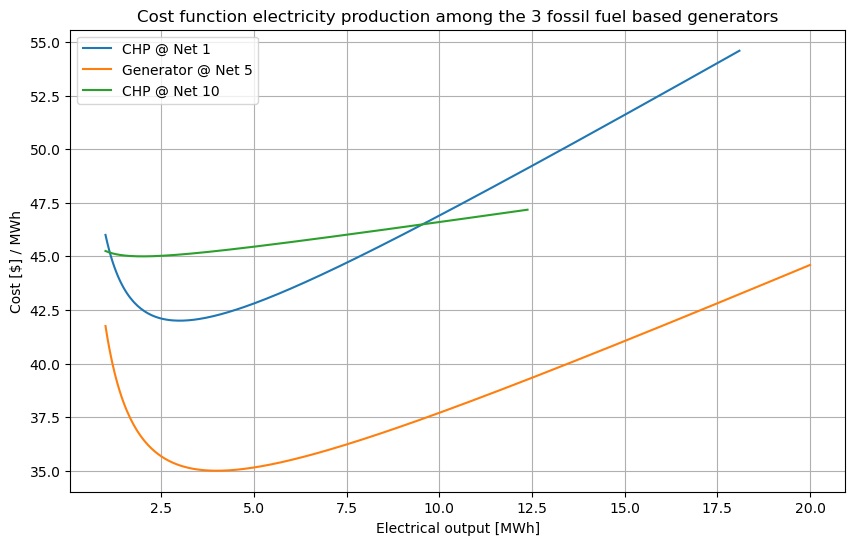

In [29]:
# Define the functions divided by x
def f_div_x(x):
    return ((x - 3)**2 + x*42) / x

def f2_div_x(x):
    return (0.75*(x-4)**2 + x*35) / x

def f3_div_x(x):
    return (0.25*(x-2)**2 + x*45) / x

# Compute the values of the functions divided by x, avoiding division by zero
x_nonzero = np.linspace(1, 20, 400)  # Start from 0.1 to avoid division by zero
y_f_div_x = f_div_x(x_nonzero)
y_f2_div_x = f2_div_x(x_nonzero)
y_f3_div_x = f3_div_x(x_nonzero)

# Plot the functions divided by x
plt.figure(figsize=(10, 6))
plt.plot(x_nonzero[0:360], y_f_div_x[0:360], label='CHP @ Net 1')
plt.plot(x_nonzero, y_f2_div_x, label='Generator @ Net 5')
plt.plot(x_nonzero[0:240], y_f3_div_x[0:240], label='CHP @ Net 10')

# Add labels and title
plt.xlabel('Electrical output [MWh]')
plt.ylabel('Cost [$] / MWh')
plt.title('Cost function electricity production among the 3 fossil fuel based generators')
plt.legend()

# Show the plot
plt.grid(True)
plt.savefig('cost_function_gens.png', dpi=300)

plt.show()

In [89]:
TL_1.power

[1.311,
 1.314,
 1.347,
 1.368,
 1.374,
 1.389,
 1.434,
 1.509,
 1.56,
 1.581,
 1.566,
 1.524,
 1.482,
 1.4369999999999998,
 1.3920000000000001,
 1.359,
 1.368,
 1.446,
 1.584,
 1.62,
 1.548,
 1.5030000000000001,
 1.5390000000000001,
 1.578,
 1.5870000000000002,
 1.6380000000000001,
 1.677,
 1.6949999999999998,
 1.698,
 1.71,
 1.758,
 1.842,
 1.9020000000000001,
 1.92,
 1.893,
 1.8359999999999999,
 1.782,
 1.7249999999999999,
 1.6620000000000001,
 1.62,
 1.6230000000000002,
 1.71,
 1.866,
 1.9020000000000001,
 1.815,
 1.755,
 1.791,
 1.83,
 1.8359999999999999,
 1.8900000000000001,
 1.9260000000000002,
 1.941,
 1.941,
 1.947,
 1.995,
 2.085,
 2.145,
 2.16,
 2.1239999999999997,
 2.052,
 1.983,
 1.9140000000000001,
 1.839,
 1.7879999999999998,
 1.785,
 1.8780000000000001,
 2.04,
 2.073,
 1.971,
 1.899,
 1.932,
 1.968,
 1.965,
 2.016,
 2.0490000000000004,
 2.055,
 2.043,
 2.0460000000000003,
 2.085,
 2.169,
 2.2199999999999998,
 2.226,
 2.178,
 2.094,
 2.013,
 1.929,
 1.842,
 1.779,
 1.767

In [82]:
def average(lst):
    return sum(lst) / len(lst)

def printDuals(nets):
    i=1
    for n in nets:
        print(f"Net {i} - avg Dual: {average(n.dual)}")
        i +=1
        
def printMaxCapacity(transmissions, epsilon):
    i =1 
    for t in transmissions:
        count = sum(1 for value in t.Econnections[0].powerValues if abs(value - t.power_max) <= epsilon)
        print(f"Transmission line {i} is {count/87.60:.2f}% of the time opertaing at its maximum capacity")
        i+=1
printMaxCapacity(transmisions, 0.1)
printDuals(nets)

Transmission line 1 is 5.09% of the time opertaing at its maximum capacity
Transmission line 2 is 0.00% of the time opertaing at its maximum capacity
Transmission line 3 is 0.00% of the time opertaing at its maximum capacity
Transmission line 4 is 0.00% of the time opertaing at its maximum capacity
Transmission line 5 is 4.44% of the time opertaing at its maximum capacity
Transmission line 6 is 0.14% of the time opertaing at its maximum capacity
Transmission line 7 is 45.08% of the time opertaing at its maximum capacity
Transmission line 8 is 10.08% of the time opertaing at its maximum capacity
Transmission line 9 is 19.54% of the time opertaing at its maximum capacity
Transmission line 10 is 0.75% of the time opertaing at its maximum capacity
Transmission line 11 is 48.92% of the time opertaing at its maximum capacity
Transmission line 12 is 0.00% of the time opertaing at its maximum capacity
Net 1 - avg Dual: -58.064521977298696
Net 2 - avg Dual: -57.17115965202113
Net 3 - avg Dual: 

In [ ]:
df = pd.read_excel('ThermalLoadHousehold.xlsx')

In [83]:
printDuals(nets)

Net 1 - avg Dual: -58.064521977298696
Net 2 - avg Dual: -57.17115965202113
Net 3 - avg Dual: -68.44426394524969
Net 4 - avg Dual: -59.09200784088376
Net 5 - avg Dual: -44.6257091700658
Net 6 - avg Dual: -50.48960694391412
Net 7 - avg Dual: -57.06326326265605
Net 8 - avg Dual: -69.3820813214962
Net 9 - avg Dual: -55.95496436947401
Net 10 - avg Dual: -69.47656757524636


In [84]:
printMaxCapacity(transmisions, 0.1)

Transmission line 1 is 5.09% of the time opertaing at its maximum capacity
Transmission line 2 is 0.00% of the time opertaing at its maximum capacity
Transmission line 3 is 0.00% of the time opertaing at its maximum capacity
Transmission line 4 is 0.00% of the time opertaing at its maximum capacity
Transmission line 5 is 4.44% of the time opertaing at its maximum capacity
Transmission line 6 is 0.14% of the time opertaing at its maximum capacity
Transmission line 7 is 45.08% of the time opertaing at its maximum capacity
Transmission line 8 is 10.08% of the time opertaing at its maximum capacity
Transmission line 9 is 19.54% of the time opertaing at its maximum capacity
Transmission line 10 is 0.75% of the time opertaing at its maximum capacity
Transmission line 11 is 48.92% of the time opertaing at its maximum capacity
Transmission line 12 is 0.00% of the time opertaing at its maximum capacity


In [88]:
nets[5].Econnections

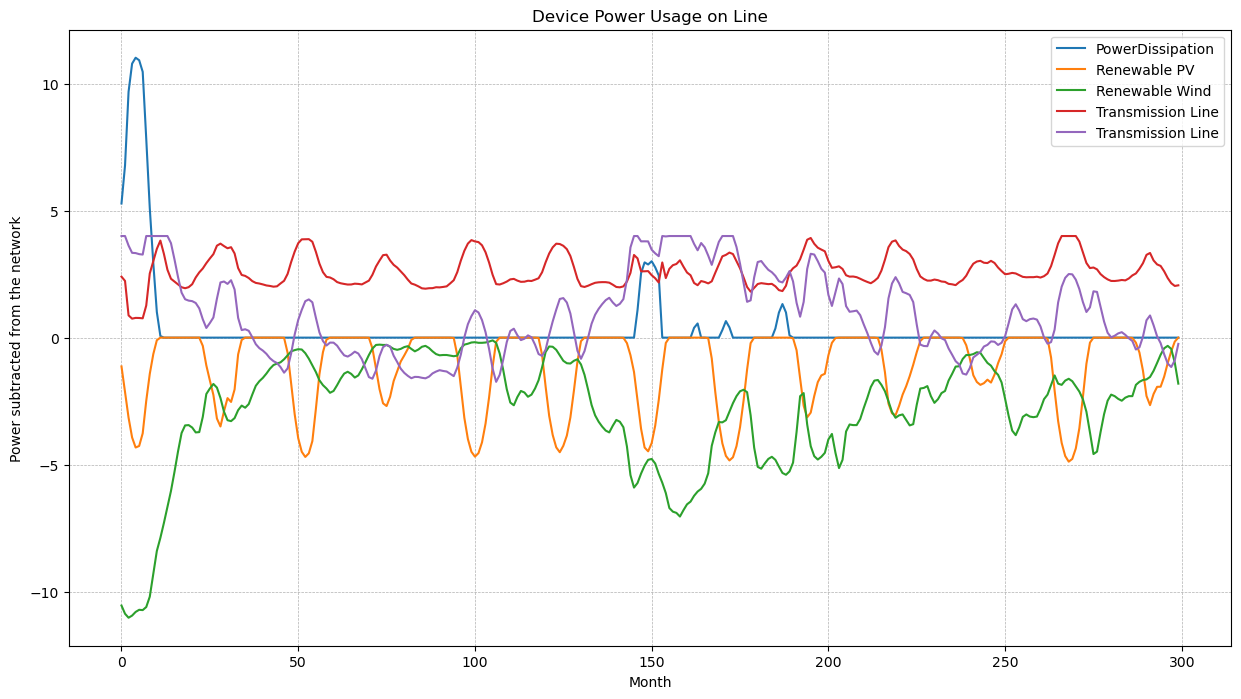

In [89]:
nets[5].plotData()

In [136]:
def renewablePowerShed(power_dissipation_devices):
    return sum([sum(sublist.Econnection[0].powerValues) for sublist in power_dissipation_devices])        

def unusedHeat(heat_dissipation_devices):
    return sum([sum(sublist.Hconnection[0].powerValues) for sublist in heat_dissipation_devices])

def emissions(generators, boilers, alpha):
    #alpha is the emission per mwh output electricity
    total = 0        
    total += sum([sum(sublist.Econnection[0].powerValues) for sublist in generators]) * alpha
    total += sum([sum(sublist.Hconnection[0].powerValues) for sublist in boilers])    * alpha * 0.444 
    return total
    


In [137]:
m.ObjVal

7357028.2059730645

## EINDE

In [ ]:
potential_devices = [P_W_1_3, P_W_1_6, P_W_2_3, P_W_2_6, P_W_3_3, P_W_3_6, P_W_4_3, P_W_4_6, P_W_5_3, P_W_5_6, P_W_6_3, P_W_6_6, P_W_7_3, P_W_7_6, P_W_8_3, P_W_8_6, P_W_9_3, P_W_9_6, P_W_10_3, P_W_10_6,
                     P_PV_1_1, P_PV_1_4, P_PV_2_1, P_PV_2_4, P_PV_3_1, P_PV_3_4, P_PV_4_1, P_PV_4_4, P_PV_5_1, P_PV_5_4, P_PV_6_1, P_PV_6_4, P_PV_7_1, P_PV_7_4, P_PV_8_1, P_PV_8_4, P_PV_9_1, P_PV_9_4, P_PV_10_1, P_PV_10_4,
                     P_B_1_60,  P_B_1_120,  P_B_2_60,  P_B_2_120,  P_B_3_60,  P_B_3_120,  P_B_4_60,  P_B_4_120,  P_B_5_60,  P_B_5_120,  P_B_6_60,  P_B_6_120,  P_B_7_60,  P_B_7_120,  P_B_8_60,  P_B_8_120,  P_B_9_60,  P_B_9_120,  P_B_10_60,  P_B_10_120, 
                     P_T_1_high, P_T_1_low, P_T_2_high, P_T_2_low, P_T_3_high, P_T_3_low, P_T_4_high, P_T_4_low, P_T_5_high, P_T_5_low, P_T_6_high, P_T_6_low, P_T_7_high, P_T_7_low, P_T_8_high, P_T_8_low, P_T_9_high, P_T_9_low]

# Investment options reduced

In [36]:
#initiate the model and the time vector

m = gp.Model()
log_file = "gurobi_log.log"
m.setParam(GRB.Param.LogFile, log_file)
# m.setParam('TimeLimit', 60)          # Terminate after 60 seconds
# m.setParam('MIPGap', 0.01)           # Terminate when within 1% of optimal solution
# m.setParam('Presolve', 2)            # Aggressive presolve
# m.setParam('Cuts', 2)                # Aggressive cuts
# m.setParam('Heuristics', 0.5)        # Increase heuristics

T = list(range(8760))


wind_capacity = 6
pv_capacity = 4
storage_capacity = 60
high_transmission_cap = 3
transmission_cap = 5

price_list = { 'Storage' : {storage_capacity : 24}, 
              'Wind' :{wind_capacity: 6}, 
              'PV' :{pv_capacity: 3},
              'Transmission' : {'Short':{transmission_cap: 15}, 'Long':{transmission_cap :24}}
             }

# P_W_1 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_2 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_3 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_4 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_5 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_6 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
P_W_7 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_8 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_9 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)
# P_W_10 = PotentialRenewable(T, m, price_list, 'Wind', wind_capacity)

# P_PV_1 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_2 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_3 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_4 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_5 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_6 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_7 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_8 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
P_PV_9 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)
# P_PV_10 = PotentialRenewable(T, m, price_list, 'PV', pv_capacity)

# P_B_1 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_2 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# # P_B_3 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_4 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_5 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_6 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_7 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_8 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_9 = PotentialStorage(T, m, price_list, discharge_max = 2, charge_max = 2, energy_max =storage_capacity)
# P_B_10 = PotentialStorage(T, m, price_list,discharge_max = 2, charge_max = 2, energy_max = storage_capacity)


# P_T_1 = PotentialTransmissionLine(T, m, price_list, length = 'Long', power_max =transmission_cap)
# P_T_2 = PotentialTransmissionLine(T, m, price_list, length = 'Long', power_max =transmission_cap)
# P_T_3 = PotentialTransmissionLine(T, m, price_list, length = 'Short',power_max = mission_cap)
# P_T_4 = PotentialTransmissionLine(T, m, price_list, length = 'Long', power_max =transmission_cap)
# P_T_5 = PotentialTransmissionLine(T, m, price_list, length = 'Short',power_max = transmission_cap)
# # P_T_6 = PotentialTransmissionLine(T, m, price_list, length = 'Long', power_max =transmission_cap)
# P_T_7 = PotentialTransmissionLine(T, m, price_list, length = 'Long', power_max =transmission_cap)
# P_T_8 = PotentialTransmissionLine(T, m, price_list, length = 'Long', power_max =transmission_cap)
# P_T_9 = PotentialTransmissionLine(T, m, price_list, length = 'Short',power_max = transmission_cap)

# potential_devices = [P_W_1, P_W_2, P_W_3, P_W_4, P_W_5, P_W_6, P_W_7, P_W_8, P_W_9, P_W_10,
#                      P_PV_1, P_PV_2, P_PV_3, P_PV_4, P_PV_5, P_PV_6, P_PV_7, P_PV_8, P_PV_9, P_PV_10,
#                      P_B_1,  P_B_2, P_B_3, P_B_4, P_B_5, P_B_6, P_B_7, P_B_8, P_B_9, P_B_10, 
#                      P_T_1, P_T_5, P_T_7, P_T_8]

# potential_devices = [
#     P_W_2, P_W_3, P_W_5, P_W_7, P_W_9,
#     P_PV_1, P_PV_2, P_PV_3, P_PV_4, P_PV_9, P_PV_10,
#     P_B_2, P_B_6, P_B_8,
#     P_T_1, P_T_5, P_T_7, P_T_8
# ]

potential_devices = [
    P_W_7, P_PV_9, 
    # P_B_6, 
    # P_T_1
]

Set parameter LogFile to value "gurobi_log.log"


In [26]:
P_W_7.investment_cost

6

In [37]:

##############################
# NET 1 Devices: 
LE_hh_1= FixedLoad(T, m,  'Households' , 30000)
LE_wc_1= FixedLoad(T, m, 'Weighted_Commercial' , 35000)
G_1 = Generator(T, m,  power_max=12, power_min=0, ramp_min = -1, ramp_max = 1, operating_point = 3, alpha=1, beta=40, gamma = 1)
PD_1 = PowerDissipation(T, m)

##############################
# NET 2 Devices: 
LE_hh_2= FixedLoad(T, m, 'Households' , 5000)
PD_2 = PowerDissipation(T, m)


##############################
# NET 3 Devices: 
LE_m_3= FixedLoad(T, m,  'Manufacturing' , 20000)
B_3    = Storage(T, m, discharge_max = 3, charge_max = 3, energy_max = 60)
PD_3 = PowerDissipation(T, m)


##############################
# NET 4 Devices: 
B_4    = Storage(T, m, discharge_max = 2, charge_max = 2, energy_max = 30)
LE_hh_4= FixedLoad(T, m, 'Households' , 6000)
PD_4 = PowerDissipation(T, m)


##############################
# NET 5 Devices: 
G_5 = Generator(T, m,  power_max=20, power_min=0, ramp_min = -1, ramp_max = 1, operating_point = 4, alpha=0.4, beta=35, gamma = 1)
PV_5 = Renewable(T, m, technology  = 'PV', install_cap = 7)
PD_5 = PowerDissipation(T, m)


##############################
# NET 6 Devices: 
PV_6 = Renewable(T, m, technology  = 'PV', install_cap = 6)
W_6 = Renewable(T, m, technology  = 'Wind', install_cap = 9)
PD_6 = PowerDissipation(T, m)

##############################
# NET 7 Devices: 
LE_wc_7= FixedLoad(T, m, 'Weighted_Commercial' , 4000)
LE_m_7= FixedLoad(T, m, 'Manufacturing' , 5000)
PD_7 = PowerDissipation(T, m)


##############################
# NET 8 Devices: 
LE_hh_8= FixedLoad(T, m, 'Households' , 10000)
LE_wc_8= FixedLoad(T, m, 'Weighted_Commercial' , 4000)
PV_8 = Renewable(T, m, technology  = 'PV', install_cap = 2)
PD_8 = PowerDissipation(T, m)

##############################
# NET 9 Devices: 
W_9 = Renewable(T, m, technology  = 'Wind', install_cap = 3)
LE_m_9= FixedLoad(T, m, 'Manufacturing' , 45000)
PD_9 = PowerDissipation(T, m)


##############################
# NET 10 Devices: 
G_10 = Generator(T, m,  power_max=8, power_min=0, ramp_min = -0.1, ramp_max = 0.1, operating_point = 4, alpha=1.5, beta=55, gamma = 1)
LE_hh_10= FixedLoad(T, m, 'Households' , 20000)
LE_wc_10= FixedLoad(T, m, 'Weighted_Commercial' , 25000)
PD_10 = PowerDissipation(T, m)

##############################
# NET 11 Devices: 

############### Transmission Lines
T1 = TransmissionLine(T, m,alpha = 0.01 ,power_max=5)
T2 = TransmissionLine(T, m,alpha = 0.02, power_max=2)
T3 = TransmissionLine(T, m,alpha = 0.03 ,power_max=2)
T4 = TransmissionLine(T, m,alpha = 0.04, power_max=3)
T5 = TransmissionLine(T, m,alpha = 0.05, power_max=3)
T6 = TransmissionLine(T, m,alpha = 0.06 ,power_max=5)
T7 = TransmissionLine(T, m,alpha = 0.07 ,power_max=5)
T8 = TransmissionLine(T, m,alpha = 0.08, power_max=5)
T9 = TransmissionLine(T, m,alpha = 0.09 ,power_max=5)
T10= TransmissionLine(T, m,alpha = 0.10, power_max=5)
T11 = TransmissionLine(T, m,alpha = 0.11, power_max=5)
T12 = TransmissionLine(T, m,alpha = 0.12 ,power_max=5)
# T13 = TransmissionLine(T, m, power_max=5)

transmisions = [T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12]


In [38]:
pot_1 = [
        # P_PV_1.Econnections[0], 
        # P_T_1.Econnections[0], 
        ]

pot_2 = [
        # P_W_2.Econnections[0],
        # P_PV_2.Econnections[0],
        # P_B_2.Econnections[0],
        ]

pot_3 = [
        # P_W_3.Econnections[0],
        # P_PV_3.Econnections[0],
        ]

pot_4 = [
        # P_PV_4.Econnections[0],
        # P_T_5.Econnections[0]
        ]

pot_5 = [
        # P_W_5.Econnections[0],
        # P_T_5.Econnections[1],
        # P_T_7.Econnections[0],
        ]

pot_6 = [
        # P_B_6.Econnections[0],
        # P_T_1.Econnections[1],
        # P_T_8.Econnections[0]
        ]

pot_7 = [
        P_W_7.Econnections[0],
        ]

pot_8 = [
        # P_B_8.Econnections[0],
        # P_T_7.Econnections[1],
        ]

pot_9 = [
        # P_W_9.Econnections[0],
        P_PV_9.Econnections[0],
        ]

pot_10 = [
        # P_PV_10.Econnections[0],
        # P_T_8.Econnections[1]
         ]

In [29]:
pot_9[0].device

In [39]:

N1 = Network(T,  m, [PD_1.Econnections[0], LE_hh_1.Econnections[0], LE_wc_1.Econnections[0], G_1.Econnections[0], T1.Econnections[0], T2.Econnections[0]] + pot_1)
N2 = Network(T,  m, [PD_2.Econnections[0], LE_hh_2.Econnections[0], T2.Econnections[1], T3.Econnections[0]] + pot_2)
N3 = Network(T,  m, [PD_3.Econnections[0], LE_m_3.Econnections[0], B_3.Econnections[0], T4.Econnections[0], T5.Econnections[0]] + pot_3)
N4 = Network(T,  m, [PD_4.Econnections[0], LE_hh_4.Econnections[0], B_4.Econnections[0], T1.Econnections[1], T6.Econnections[0]] + pot_4)
N5 = Network(T,  m, [PD_5.Econnections[0], G_5.Econnections[0], PV_5.Econnections[0], T3.Econnections[1], T4.Econnections[1], T7.Econnections[0]] + pot_5)
N6 = Network(T,  m, [PD_6.Econnections[0], PV_6.Econnections[0], W_6.Econnections[0], T8.Econnections[0], T9.Econnections[0]] + pot_6)
N7 = Network(T,  m, [PD_7.Econnections[0], LE_wc_7.Econnections[0], LE_m_7.Econnections[0], T6.Econnections[1], T7.Econnections[1], T9.Econnections[1], T10.Econnections[0], T11.Econnections[0]] + pot_7)
N8 = Network(T,  m, [PD_8.Econnections[0], LE_hh_8.Econnections[0], LE_wc_8.Econnections[0], PV_8.Econnections[0], T5.Econnections[1], T12.Econnections[0]] + pot_8)
N9 = Network(T,  m, [PD_9.Econnections[0], W_9.Econnections[0], LE_m_9.Econnections[0], T8.Econnections[1], T10.Econnections[1]] + pot_9)
N10 = Network(T, m, [PD_10.Econnections[0], G_10.Econnections[0], LE_hh_10.Econnections[0], LE_wc_10.Econnections[0], T11.Econnections[1], T12.Econnections[1]] + pot_10)

nets = [N1, N2, N3, N4, N5, N6, N7, N8, N9, N10]

In [40]:
addBudgetConstraint(potential_devices, m, 6)

In [41]:
m.optimize()
if m.status == GRB.OPTIMAL:
    print("Optimal solution found.")
elif m.status == GRB.INFEASIBLE:
    print("Model is infeasible.")
elif m.status == GRB.UNBOUNDED:
    print("Model is unbounded.")
elif m.status == GRB.INF_OR_UNBD:
    print("Model is either infeasible or unbounded.")
else:
    print("Optimization was stopped with status", m.status)
# N1.updateDual()


Interrupt request received
Optimization was stopped with status 11


In [33]:
for p in potential_devices:
    print(p.z.x)

AttributeError: Unable to retrieve attribute 'x'

In [18]:
def average(lst):
    return sum(lst) / len(lst)

In [14]:
[1,2,3] +[]

[1, 2, 3]

In [18]:
old_powervalues = {'T1': T1.Econnections[0].powerValues ,
                   'T2': T2.Econnections[0].powerValues,
                  'T3': T3.Econnections[0].powerValues,
                  'T4': T4.Econnections[0].powerValues,
                  'T5': T5.Econnections[0].powerValues,
                  'T6': T6.Econnections[0].powerValues,
                  'T7': T7.Econnections[0].powerValues,
                  'T8': T8.Econnections[0].powerValues,
                  'T9': T9.Econnections[0].powerValues,
                  'T10': T10.Econnections[0].powerValues,
                  'T11': T11.Econnections[0].powerValues,
                  'T12': T12.Econnections[0].powerValues,}

In [61]:
min(PD_7.Econnections[0].powerValues)

4.5481772581004014e-11

In [15]:
T10.Econnections[0].powerValues.index(min(T10.Econnections[0].powerValues))


2004

In [32]:
T10.Econnections[0].powerValues

[-0.47273802010873567,
 -0.5199238078798629,
 -0.673681549922506,
 -0.7684952922630686,
 -0.9217762951329007,
 -0.9994854501848778,
 -0.9994834937104145,
 -0.9994878643423135,
 -0.9284159132561598,
 -0.7686391370959313,
 -0.5474050880459345,
 -0.6797315175766698,
 -0.9749017309947163,
 -0.9994990393350633,
 -0.9994986400288042,
 -0.8666579149518867,
 -0.9500391046071712,
 -0.999498846849221,
 -0.9994992861859942,
 -0.9994993653995152,
 -0.9994993594260393,
 -0.9994993561267904,
 -0.9994992491558747,
 -0.9994992144848993,
 -0.9994991921057164,
 -0.999499087385658,
 -0.9994992422081737,
 -0.9994990196044142,
 -0.999499055294919,
 -0.9994986976397939,
 -0.9994978645267878,
 -0.8537949689016529,
 -0.8028416199518063,
 -0.8522315872020982,
 -0.9226490252322321,
 -0.8981522495472802,
 -0.9994884789078355,
 -0.9990480687796435,
 -0.47545868534588465,
 0.05031363721181492,
 0.19263536331816056,
 0.15263459546355307,
 0.33189405299064845,
 0.5652022235829577,
 0.7320691215254413,
 0.78799489499

In [20]:
T10.Econnections[0].powerValues

[-0.2014074399622814,
 -0.21424237990522954,
 -0.28665717425552373,
 -0.32971223599588484,
 -0.3953075389947429,
 -0.4321454034122354,
 -0.4781843456822088,
 -0.4823855540709019,
 -0.4330044486273863,
 -0.37350531203445314,
 -0.2637579937086514,
 -0.3255117702982204,
 -0.4486611356771846,
 -0.5894818840901053,
 -0.5268548399913158,
 -0.4019897750293495,
 -0.43865799803778316,
 -0.5694529220213553,
 -0.6608209884199567,
 -0.6814538731379542,
 -0.6779966547969423,
 -0.6751790649163354,
 -0.6444676738938568,
 -0.6335323645213009,
 -0.6211317543388617,
 -0.561075049923133,
 -0.626120613583069,
 -0.5377983713446923,
 -0.5946229256834243,
 -0.5358641703392237,
 -0.49603658233495196,
 -0.3970137034081773,
 -0.38906784338284695,
 -0.4115959439689618,
 -0.43053977060611714,
 -0.41925088634897634,
 -0.48223814876685367,
 -0.46044392518720656,
 -0.21422061770459777,
 0.08131790741774125,
 0.15842822524955125,
 0.13368672436601514,
 0.23408097540915662,
 0.357183489234842,
 0.4362307643821026,
 0.

In [33]:
T8.Econnections[0].powerValues

[1.8421624619271881,
 1.863516613309855,
 1.9304497484565388,
 1.9774288764862007,
 2.0670187521938033,
 2.1539446077876505,
 2.264501034067223,
 2.3531924636012604,
 2.450496071454964,
 2.3851674158038207,
 2.3235929664777615,
 2.5496715156892833,
 2.7365159938465524,
 2.6313635233270958,
 2.6475309721687523,
 2.482982832594729,
 2.3435236078774295,
 2.132851639206251,
 1.870476286489037,
 1.7764990315851321,
 1.758449083309742,
 1.7307647387985128,
 1.8013319909485404,
 1.824640657129052,
 1.819617175761337,
 1.7447406683734812,
 1.7533665282268203,
 1.7617119306187163,
 1.8748853726095263,
 2.0847754039522357,
 2.2796546012624788,
 2.380003574613937,
 2.4235350390487866,
 2.5007158156805076,
 2.714261803166778,
 2.8465204348466244,
 2.8339690242069793,
 2.8519859727154397,
 2.5366200003063994,
 2.132712891105811,
 1.8994751640951932,
 1.8854487366502468,
 1.7861730544754835,
 1.6688612131252114,
 1.5812342275689275,
 1.5281472480779854,
 1.5243919509007355,
 1.542327557332115,
 1.55

In [24]:
T8.Econnections[0].powerValues

[1.5726900274906086,
 1.5595492675395661,
 1.5446922427265832,
 1.5396493317429218,
 1.5413106566261234,
 1.5876476368676578,
 1.7429828343174876,
 1.8359569133532574,
 1.955117907106228,
 1.9902485923765028,
 2.0412527094316317,
 2.196201214469994,
 2.2096702370243975,
 2.22118381628988,
 2.1743983369569406,
 2.018357175946562,
 1.8321331354430015,
 1.703364244996024,
 1.533010696008219,
 1.4598330759498879,
 1.4382070580479223,
 1.4076174228462435,
 1.447278683369447,
 1.4595638683676242,
 1.4421448067910632,
 1.307744295674894,
 1.3813359258309816,
 1.3020714186025373,
 1.4716682324988568,
 1.6227159190175797,
 1.7760219985417507,
 1.9235013308862392,
 2.009854446358446,
 2.060030707166149,
 2.221816686596455,
 2.3671452302259866,
 2.3158568738711267,
 2.312233906847851,
 2.276407159033667,
 2.1041649643520373,
 1.9364024691457615,
 1.9069955167591814,
 1.8867625615728798,
 1.8800380007224646,
 1.880462544437691,
 1.8568144513861995,
 1.8516878137243538,
 1.8460620659116813,
 1.8341

In [34]:
T9.Econnections[0].powerValues

[2.315837536539547,
 2.384483385403314,
 2.605550250277517,
 2.7475711221676704,
 2.9909812461132645,
 3.3810553902991245,
 3.4594989645554364,
 3.568807534911784,
 3.3815039268483105,
 3.155832582755721,
 2.8724070320318873,
 3.231328482871632,
 3.716484004806162,
 4.9436364753501465,
 4.31246902651651,
 3.352017166112219,
 3.296476390797096,
 4.140148359199401,
 5.023523711893418,
 5.2885009668314495,
 5.2525509151235354,
 5.217235259660413,
 4.8496680075645315,
 4.754359341519077,
 4.723382822909429,
 5.02325932988532,
 4.99663347027996,
 4.9792880672585085,
 4.587114625249825,
 4.0892245942022925,
 3.687345397418497,
 3.2359964238777366,
 3.2284649594245423,
 3.3552841829044695,
 3.6397381954504198,
 3.747479563781056,
 4.03903097446333,
 3.9100140259871523,
 3.013379998420362,
 2.0822871076113074,
 1.7065248345835187,
 1.7325512618077568,
 1.4538269439091351,
 1.103138785273103,
 0.8487657708274838,
 0.7398527502968477,
 0.7346080474723635,
 0.7886724410651595,
 0.8396260328608776

In [23]:
T9.Econnections[0].powerValues

[2.58395954224909,
 2.6871847769335204,
 2.990133845371986,
 3.1842291592596155,
 3.5154331504185876,
 3.945731343602489,
 3.9798963111984307,
 4.084587045531208,
 3.8751279476795446,
 3.5492304985627356,
 3.1531609410640584,
 3.5833079012688955,
 4.241923719917949,
 5.352753590586616,
 4.784540107132301,
 3.815347039230005,
 3.8064103253460218,
 4.567993947484496,
 5.3592222028945,
 5.603427644813209,
 5.571228424042133,
 5.538962563964773,
 5.2023657302422635,
 5.118173056344546,
 5.0996773033223946,
 5.458467952470556,
 5.367382079177091,
 5.436684717542732,
 4.98877437165018,
 4.549663247188619,
 4.189860589752499,
 3.691062323526282,
 3.640622377260442,
 3.794487183033908,
 4.130734337686562,
 4.225520516841144,
 4.555898660885049,
 4.4487589945708805,
 3.272619367692883,
 2.109708699096842,
 1.6684080335995048,
 1.7097824759439533,
 1.3520140525175464,
 0.8907216239882843,
 0.5483319667959421,
 0.41006121814639584,
 0.4062559711988456,
 0.48396233082429774,
 0.5589303759153808,
 